In [1]:
%%capture
# DO NOT EDIT THIS NOTEBOOK
# It generates a report to verify your submission
import logging, sys, os
logging.disable(sys.maxsize)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import solution
import time
start_verify = time.time()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3)

In [2]:
%matplotlib inline
import os
import pickle
import pandas as pd
import numpy as np
import pydot
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import inspect
from IPython.core import page
page.page = print

grades = []

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')
        
def printSource(obj):
    print(''.join(str(x) for x in inspect.getsourcelines(obj)[0]))
        
# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

def print_answer(ans):
    output = ""
    for line in ans.splitlines()[1:]:
        output += line.strip() + " "
    output += "(length: "+str(len(output))+")\n"
    print(output)
        
def run_evaluation(name, model_builder, data, base_dir, target_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, print_model=True, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        grades.append("0")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Model not trained? Skipping.", verbose)
    else: # Load from file
        model = solution.load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
    # Report
    lc = pd.DataFrame(learning_curves)
    print("Max val score: {:.2f}%".format(lc.iloc[:,3].max()*100))
    grades.append("{:.2f}".format(lc.iloc[:,3].max()*100))
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    plt.show()
    
    if print_model:
        print(model.summary())
    plot_model(model, to_file=os.path.join(target_dir,name+'.png'), show_shapes=True, show_layer_names=False)
        
import pprint
pp = pprint.PrettyPrinter(indent=4)

### Web Information Retrieval and Data Mining - Assignment 3

In [3]:
grades.append(solution.target_dir.split(os.sep)[-1])
grades.append(solution.your_name)
print("Student: {0} ({1})".format(solution.your_name,solution.student_id))

Student: Kitsanelis, Christos (1489127)


#### Answer 1.1, Baseline (4p)
- Dense network, at least 3 layers, shaped like a pyramid
    - Last layer: 10 nodes, sigmoid. 
    - Loss: categorical cross-entropy. Metric: accuracy
- No preprocessing, regularization. Get at least 70% accuracy.
- Explain design decisions. Discuss performance.
    - Does it overfit (large/growing gap between loss and val_loss)?

A higher number of layers would lead to overfitting and the validation accuracy remained low. Multiple optimizers were tested, N_Adam gave the best results. Leaky ReLu was picked to prevent the dying neurons problem and led to a ~5% increase in accuracy. Epochs and batch size were chosen by receiving the best results in testing. A large batch size caused heavy fluctuations in loss. (length: 385)



Max val score: 82.81%


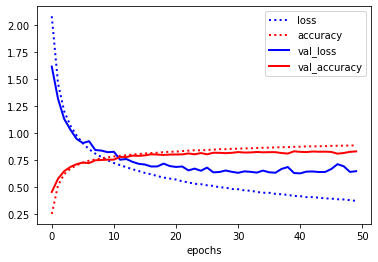

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               786688    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 64)                0

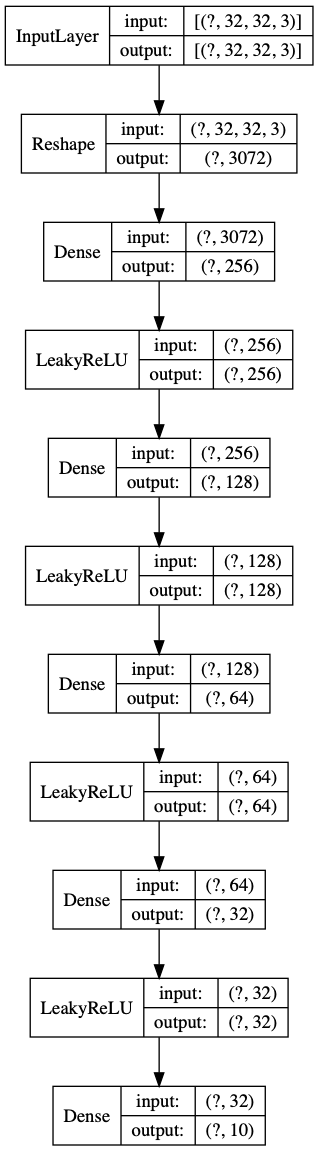

In [4]:
print_answer(solution.answer_q_1_1)
run_evaluation("model_1_1", solution.build_model_1_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_1
if os.path.exists(os.path.join(solution.target_dir,'model_1_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_1_1.png'), width=200))

#### Answer 1.2, Preprocess (2p)
- Convert images to greyscale, other preprocessing optional.
    - Input shape should be (32,32,1)
- Explain design decisions. Is it better? Why (not)? 
    - Color information is likely not so useful for classification. Greyscale makes the network smaller, less parameters to learn, less likely to overfit.

Only applying grayscale on the input data and leads to an increase of ~1% to the validation accuracy. The loss remains stable and similar to model1_1. We can conclude that the model does not pay much attention to the colour of the images. (length: 239)



Max val score: 83.72%


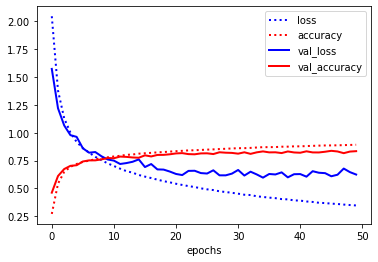

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               262400    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 64)               

def build_model_1_2():
    model = models.Sequential()
#     model.add(layers.Flatten())
    model.add(layers.Reshape((1024,), input_shape=(32, 32, 1)))
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(alpha=0.03))
    model.add(layers.Dense(128))
    model.add(layers.LeakyReLU(alpha=0.03))
    model.add(layers.Dense(64))
    model.add(layers.LeakyReLU(alpha=0.03))
    model.add(layers.Dense(32))
    model.add(layers.LeakyReLU(alpha=0.03))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=custom_nadam,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return model



In [5]:
print_answer(solution.answer_q_1_2)
run_evaluation("model_1_2", solution.build_model_1_2, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_2

#### Answer 1.3, Tune (4p)
- Regularize the model. What works best? 
    - Should consider batch normalization, dropout, l1/l2 regularization (or Nesterov)
- Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
    - At least consider tuning learning rate, ideally also momentum, decay, other optimizers 
- Explain your findings and final design decisions. Discuss the results.
    - Should be better, at least it shouldn't overfit

The regularization methods tried out were l1,l2,batch normalization and dropout. l1 gave terrible results, while l2 reached a maximum of 79% accuracy. Best results obtained by combining the remaining methods between layers. Low dropout rate of 0.1 fit the validation data well and leads to a ~3% accuracy increase. (length: 315)



Max val score: 87.07%


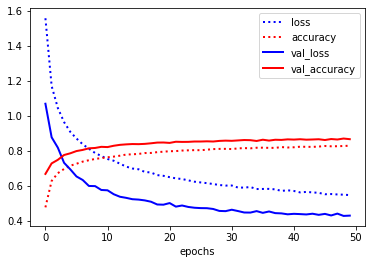

def build_model_1_3():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32, 32, 1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(alpha=0.03))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(128))
    model.add(layers.LeakyReLU(alpha=0.03))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(64))
    model.add(layers.LeakyReLU(alpha=0.03))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(32))
    model.add(layers.LeakyReLU(alpha=0.03))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=custom_nadam,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  

In [6]:
print_answer(solution.answer_q_1_3)
run_evaluation("model_1_3", solution.build_model_1_3, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
%psource solution.build_model_1_3

#### Answer 2.1, ConvNet (7p)
- Build a sequential ConvNet, get at least 90% accuracy.
    - Conv2D layers, input shape (32,32,1)
    - Consider using blocks of Conv2D layers with maxpooling in between
    - Use zero-padding in Conv2D layers because the images are small
    - At least one dense hidden layer and dense output layer (sigmoid)
    - Consider adding batch normalization, dropout
    - Consider small dropout rates in beginning, larger dropout rates later in network
    - Consider other optimizers and tuning learning rate, momentum,...
- Explain what you did and why (800 chars). Is it working well?
    - Should be quite elaborate and sensible

Tried out 3 sets of 3 convolutional layers, but led to overfitting. Leaky ReLu as activations on the convolutional layers did not work, so switched to relu. Removing MaxPool after the first 2 Convolutional layers, slightly improved the results. Adding an additional dense layer, made the model prone to overfitting. There was no need to switch the optimizer, as results were satisfactory. Larger epochs did not improve accuracy only computation time. The highest accuracy reached was 95%, which is a significant improvement over the previous models. (length: 550)



Max val score: 94.71%


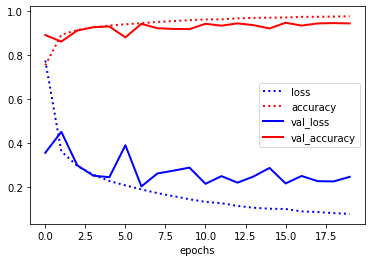

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)       

def build_model_2_1():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    mode

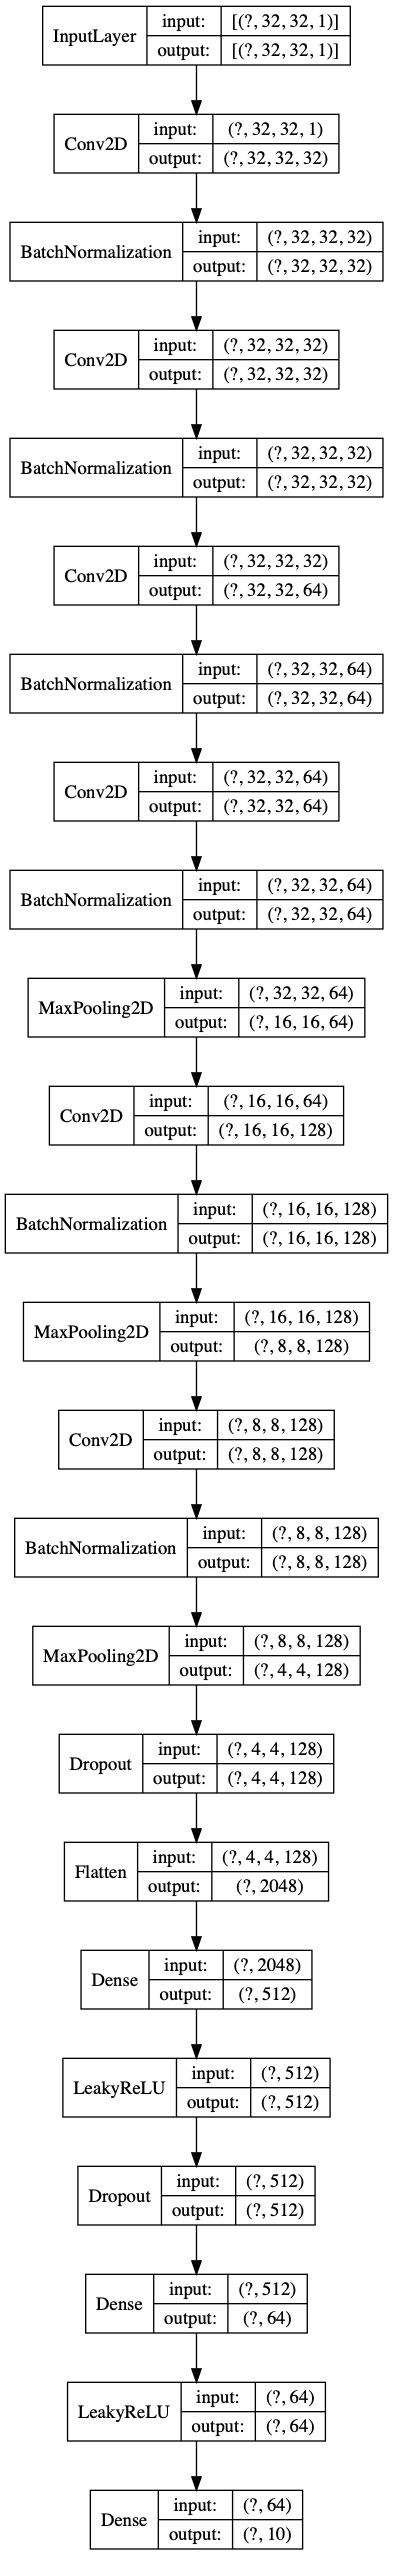

In [7]:
print_answer(solution.answer_q_2_1)
run_evaluation("model_2_1", solution.build_model_2_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_2_1
if os.path.exists(os.path.join(solution.target_dir,'model_2_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_2_1.png'), width=200))

#### Answer 2.2, Data Augmentation (3p)
- Augment the preprocessed training data.
    - Use small variations (small shifts up-down, left-right) of flips becasue the images are small
    - Large shifts and rotations distort the image too much
- Explain what you did and why. Discuss the performance of the model.

Accuracy improvements are minimal, especially if the data is augmented with few methods. Results are still good though, as we observe a steeper reduction in loss that remains steady. Smaller rotation and zoom gave slightly better results. Flipping the image, both vertically and horizontally, did not work, which was expected as numbers do not appear overturned in the images. Featurewise center did not perform well and plummeted accuracy to 81%. (length: 448)



Max val score: 94.97%


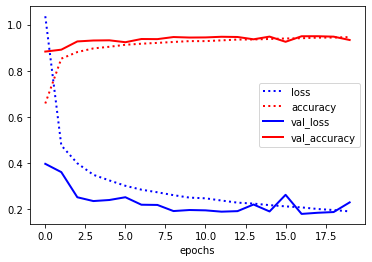


datagen = ImageDataGenerator(
	rotation_range=15,
	zoom_range=0.15,
	width_shift_range=0.05,
	height_shift_range=0.05,
	shear_range=0.15,
	fill_mode='nearest')


In [8]:
print_answer(solution.answer_q_2_2)
run_evaluation("model_2_2", solution.build_model_2_1, solution.augmented_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
print(solution.dg_code)

#### Answer 3.1, Misclassifications (2p)
- Report the test score (on the held-out test data)
    - Should be similar to score of previous model
- Plot confusion matrix, discuss which classes are often confused.
    - class 1 and 2 are most often confused
- Visualize the misclassifications in more depth by focusing on a single class
- Analyse which kinds of mistakes are made for that class.
    - Should contain some insight (e.g. misclassifications when the numbers are curly or noisy)

The most misclassified number in the model is 1, followed by 2,3 and 5. The most confused pair is between 1 and 7, along with 3 and 5. After plotting the misclassifications for multiple classes, we can distinguish three common reasons that lead to mistakes: -Noise/Distortion in conjuction with the small size of the images. -Multiple numbers appearing in the same image. -Shadows that hide details of the numbers. (length: 415)

Test score: 0.95%


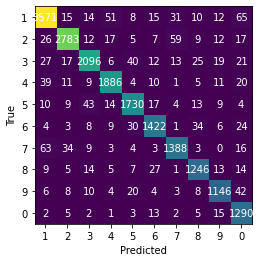

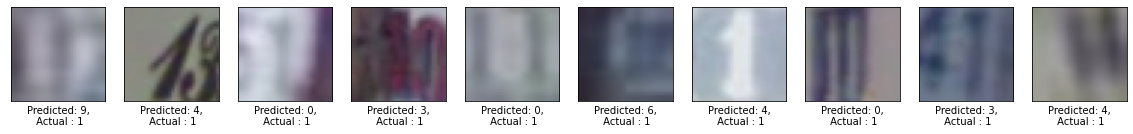

In [9]:
print_answer(solution.answer_q_3_1)
if hasattr(solution, 'test_accuracy_3_1'):
    try:
        print("Test score: {:.2f}%".format(solution.test_accuracy_3_1))
    except TypeError:
        print("Test score:",solution.test_accuracy_3_1)
else:
    print("Test score NOT FOUND: test_accuracy_3_1 missing")
try:
    solution.plot_confusion_matrix()
except:
    print("ERROR, could not build confusion matrix. Please check original report")
try:
    solution.plot_misclassifications()
except:
    print("ERROR, could not build misclassification plot. Please check original report")

#### Answer 3.2, Activations (4p)
- Retrieve and visualize the activations for one example
- For every filter for different convolutional layers (at different depths in the network).
- Give an explanation. Is your model indeed learning something useful?
    - Should detect edges etc in first layers, higher-order object (e.g. interesting regions) in deeper layers.

The used case is constructive, as the image contains two numbers and the model predicts right. The first layer does not learn much, as about half of the filter activations are empty. Layers 3 and 5 are extremely useful by highlighting the border of the number 8. Layer 5 focuses on the correct number of the two. Layer 7 appears to focus on the vertical lines of the image. The last two layers are very abstract, so it is impossible to understand how they are used for classification. (length: 485)



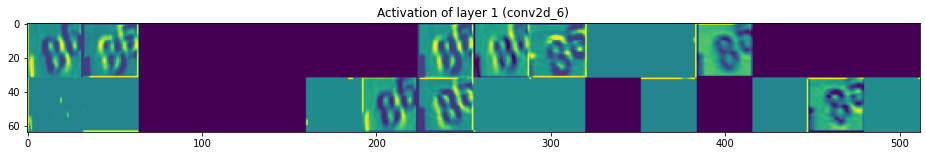

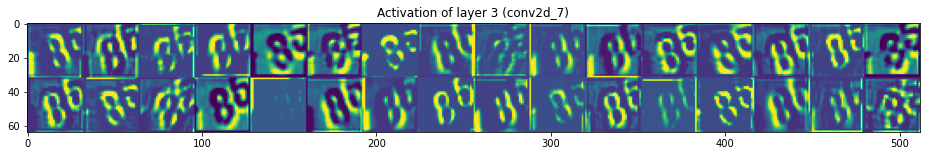

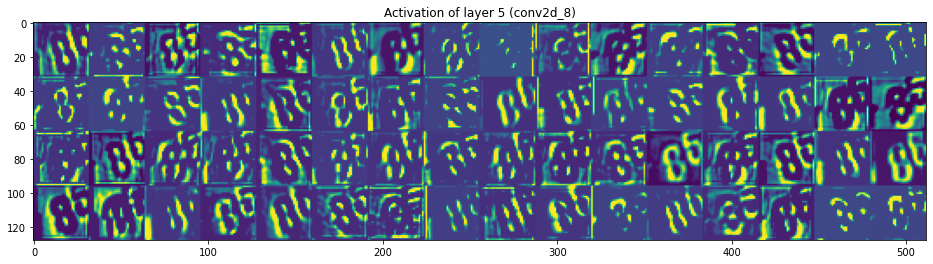

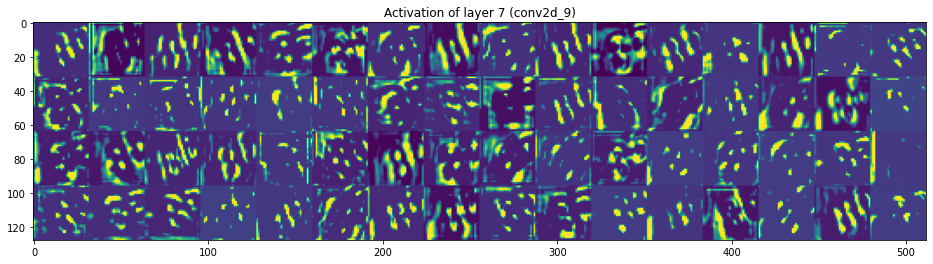

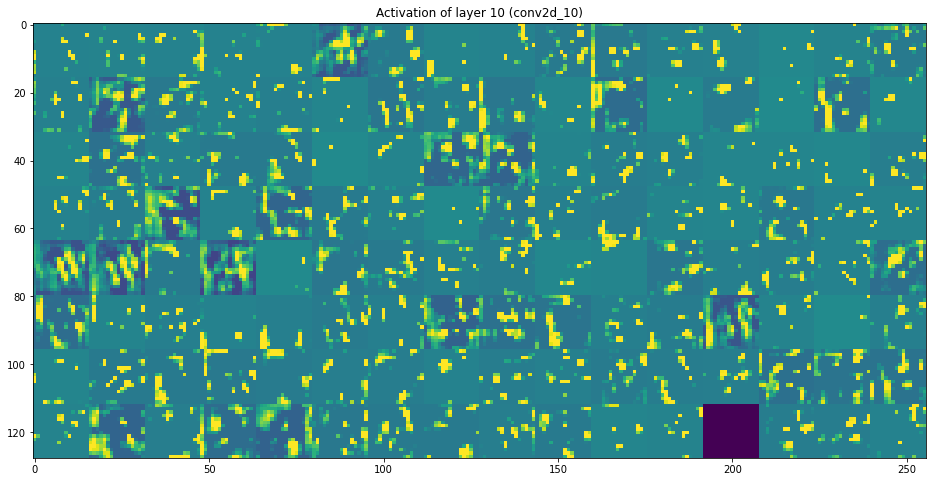

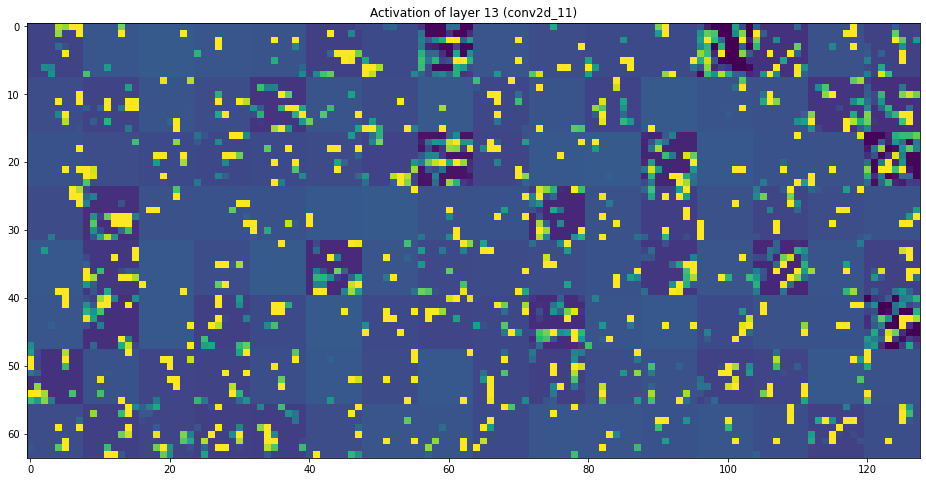

In [10]:
print_answer(solution.answer_q_3_2)
try:
    solution.plot_activations()
except:
    print("ERROR, could not build activation plot. Please check original report")

#### Answer 3.3, Class activation map (4p)
- Show a class activation map for your last convolutional layer
- Superimpose the activation map over the image, or plot side by side
    - Should make sense, detect interesting regions to classify the number

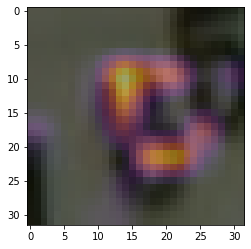

def plot_activation_map():
    model = load_model_from_file(base_dir, "model_2_2")
    img_tensor = np.expand_dims(X_test[0], axis=0)
    img_prediction = model.predict(img_tensor)
    last_output = model.get_layer("conv2d_11").output
    eight_output = model.output[:,np.argmax(img_prediction[0])]
    grads = K.gradients(eight_output, last_output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([img_tensor])
    for i in range(128):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    act_map = np.mean(conv_layer_output_value, axis=-1)
    act_map = np.maximum(act_map, 0)
    act_map /= np.max(act_map)
    return act_map



In [11]:
try:
    solution.plot_3_3()
except:
    print("ERROR, could not build class activation plot. Please check original report")
if hasattr(solution, 'plot_activation_map'):
    %psource solution.plot_activation_map
else:
    %psource solution.plot_3_3

#### Answer 4.1, Fast feature extraction (5p)
- Import the VGG16 model, pretrained on ImageNet
- Freeze convolutional base, adds a dense layer
- Consider unfreezing the last few convolutional layers and evaluate whether that works better
    - Check if they do. It is very likely to help.
- Discuss the observed performance
    - Should get around 80% accuracy

The optimizer was changed to sgd to satisfy the memory constraint while providing good results. The learning rate had to be tuned for each model to provide optimal results. Tests were conducted with unfreezing a different number of the outer layers. It would be more appropriate to train the convolutional base on our dataset to provide accurate embeddings in 4_2, so I opted to unfreeze layers 3,4,5. (length: 402)



Max val score: 93.83%


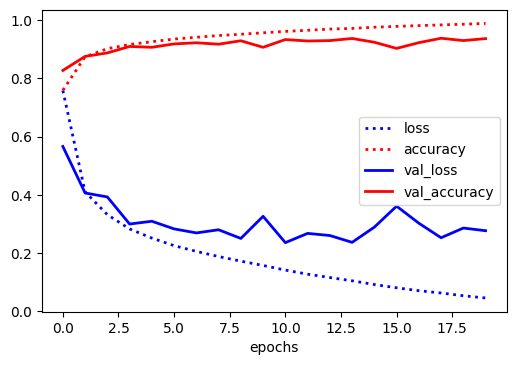

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               65664     
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 128)               0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 128)               512       
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)               

def build_model_4_1():
    model = models.Sequential()
    conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(128))
    model.add(layers.LeakyReLU(alpha=0.03))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    conv_base.trainable = True
    for layer in conv_base.layers:
        if layer.name.startswith('block5') or layer.name.startswith('block4') or layer.name.startswith('block3'):
            layer.trainable = True
        else:
            layer.trainable = False
# 3-5 freeze    0.933719
# 4-5 freeze    0.903632
# 5 freeze     0.824574
# no freeze 0.939321
    model.compile(optimizer=optimizers.SGD(lr=3e-3),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return model



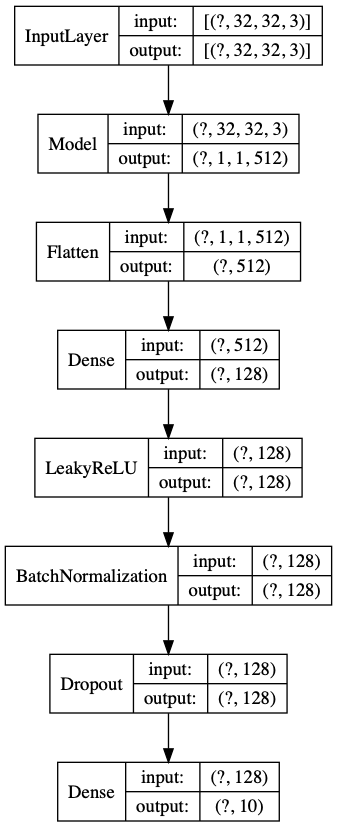

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

print_answer(solution.answer_q_4_1)
run_evaluation("model_4_1", solution.build_model_4_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_4_1
if os.path.exists(os.path.join(solution.target_dir,'model_4_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_4_1.png'), width=200))
#solution.build_model_4_1().layers[0].summary()

#### Answer 4.2, Embeddings (5p)
- Generate embeddings with the trained convolutional part of model_4_1 (without the dense layer)
- Embed the training and test data and store them to disk
- Build and evaluate a pipeline on the embedded data
    - Check if pipeline makes sense (e.g. use models that can handle many dimensions)
- Describe what you did and what you observed (max 800 chars).
    - Consider different models, preprocessing, tuning, etc.
    - Check performance (see original Submission.html) when in doubt. We did not run all the evaluations because it takes too long, and the output is ill-defined.

In [13]:
print_answer(solution.answer_q_4_2)
print(solution.generate_pipeline())
#print("Evaluation:",solution.evaluation_4_2(solution.X_train, solution.y_train, solution.X_test, solution.y_test))
%psource solution.store_embeddings
%psource solution.evaluation_4_2

The tried out techniques were logistic regression, SVM and RF. The obtained score was quite satisfactory reaching 0.9417, which is slightly worse than the one from the convolutional NN. Using SVM instead of RF leads to a 0.5 improvement, but in a fraction of the time. PCA was applied in an attempt to reduce the evaluation time. (length: 330)

Pipeline(steps=[('transformer',
                 FunctionTransformer(func=<function transform at 0x245dc48c8>)),
                ('scaler', PCA()), ('classifier', SVC())])
def store_embeddings():
#   Stores all necessary embeddings to file
    conv_base = load_model_from_file('./models/', "model_4_1").layers[0]
    X_train_all_predictions = conv_base.predict(X_train_all)
    store_embedding(X_train_all_predictions, "all_train")
    X_test_predictions = conv_base.predict(X_test)
    store_embedding(X_test_predictions, "all_test")
    X_train_predictions = conv_base.predict(X_train)
    store_embedding(X_train_predictions, "X_train")
    X_val_predi

In [14]:
end_verify = time.time()
print("Running time: {:.2f} seconds".format(end_verify - start_verify))
print("Last modified: {}".format(solution.last_edit))
print("scikit-learn version: {0}".format(solution.sklearn_version))

with open(solution.grade_file, "a") as myfile:
    myfile.write(','.join(grades)+"\n")

Running time: 55.16 seconds
Last modified: May 26, 2020
scikit-learn version: 0.23.1
